# Natural Language Processing

Online materials:
- https://www.youtube.com/watch?v=jB1-NukGZm0
- https://course.spacy.io/
- https://spacy.io/usage/spacy-101
- https://github.com/explosion/spacy-notebooks

In this notebook we are gonna learn the basics of NLP using spaCy(https://spacy.io) 

Batteries included

- Index preserving tokenization (details about this later)
- Models for Part Of Speech tagging, Named Entity Recognition and Dependency Parsing
- Supports 8 languages out of the box
- Easy and beautiful visualizations
- Pretrained word vectors

It plays nicely with all the other already existing tools that you know and love: Scikit-Learn, TensorFlow, ...


## Topics
- Tokenization
- Part Of Speech
- Named Entity Recoginition
- Sentence Detection
- Text Normalization
- Word Vectors


So why we need a NLP library? We are going to explore the answer for that in a while, but before that lets see how a basic operation of splitting a paragraph can go wrong.


In [1]:
!which python
# /opt/envs/aie/bin/python

/opt/envs/aie/bin/python


In [2]:
paragraph = '''The waiter was very rude, 
e.g. when I accidentally opened the wrong door
he screamed "Private!".'''

sentences = paragraph.split('.')
print('\n'.join(sentences))

The waiter was very rude, 
e
g
 when I accidentally opened the wrong door
he screamed "Private!"



In [3]:
# Import spacy and English models
import spacy
nlp = spacy.load('en_core_web_sm')


Language Processing Pipelines

- When you call `nlp` on a text, spaCy first `tokenizes` the text to produce a `Doc object`.
- The `Doc` is then processed in several different steps – this is also referred to as the processing pipeline.
- The pipeline used by the default models consists of a `tagger`, a `parser` and an `entity recognizer`.

More info [here](https://spacy.io/usage/processing-pipelines)


### Tokenization

https://spacy.io/usage/spacy-101#annotations-token

Tokenization is the process of segmenting text into words, punctuation etc. 
spaCy tokenizes the text, processes it, and stores the data in the Doc object.
The Token class exposes a lot of word-level attributes.

![](https://spacy.io/tokenization-57e618bd79d933c4ccd308b5739062d6.svg)

In [4]:
import getpass
username = getpass.getuser()

In [5]:
text = "Hi, Myself {}. I am glad to learn NLP and use it wherver applicable!".format(username)
text

'Hi, Myself mageswarand. I am glad to learn NLP and use it wherver applicable!'

In [45]:
doc = nlp(text)
# Here’s something interesting—After processing the text, 
#spaCy keeps all the information about the original text intact within the Doc object.

In [7]:
for token in doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))


Hi	0	hi	False	False	Xx	INTJ	UH
,	2	,	True	False	,	PUNCT	,
Myself	4	Myself	False	False	Xxxxx	PROPN	NNP
mageswarand	11	mageswarand	False	False	xxxx	NOUN	NN
.	22	.	True	False	.	PUNCT	.
I	24	-PRON-	False	False	X	PRON	PRP
am	26	be	False	False	xx	AUX	VBP
glad	29	glad	False	False	xxxx	ADJ	JJ
to	34	to	False	False	xx	PART	TO
learn	37	learn	False	False	xxxx	VERB	VB
NLP	43	NLP	False	False	XXX	PROPN	NNP
and	47	and	False	False	xxx	CCONJ	CC
use	51	use	False	False	xxx	VERB	VB
it	55	-PRON-	False	False	xx	PRON	PRP
wherver	58	wherver	False	False	xxxx	ADV	RB
applicable	66	applicable	False	False	xxxx	ADJ	JJ
!	76	!	True	False	!	PUNCT	.


[spaCy Doc](https://spacy.io/api/doc)

In [8]:
text = u"I can't imagine spending $3000 for a single bedroom apartment in N.Y.C."
doc = nlp(text)
# Print out tokens
for token in doc:
    print(token)

I
ca
n't
imagine
spending
$
3000
for
a
single
bedroom
apartment
in
N.Y.C.


### Sentence Detection

In [ ]:
def print_sentences(text):
    doc = nlp(text)
    for sent in doc.sents:
        print(sent)

In [ ]:
print_sentences(paragraph)

In [ ]:
text = "The path of the righteous man is beset on all sides by the iniquities of the selfish and the tyranny of evil men. Blessed is he who, in the name of charity and good will, shepherds the weak through the valley of darkness, for he is truly his brother's keeper and the finder of lost children. And I will strike down upon thee with great vengeance and furious anger those who would attempt to poison and destroy My brothers. And you will know My name is the Lord when I lay My vengeance upon thee."

In [ ]:
print_sentences(text)

### Stop Words

In [10]:
doc = nlp(text)
for word in doc:
    if word.is_stop == True:
        print(word)

I
ca
n't
for
a
in


### [Named Entity Recognition](https://en.wikipedia.org/wiki/Named-entity_recognition)

Named entity recognition refers to the identification of words in a sentence as an entity e.g. the name of a person, place, organization, etc.

`spaCy` can recognise various types of named entities in a document, by asking the model for a prediction. Because models are statistical and strongly depend on the examples they were trained on, this doesn't always work perfectly and might need some tuning later, depending on your use case.

https://spacy.io/usage/linguistic-features#section-named-entities

In [11]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY



**Entities Explained** : https://spacy.io/api/annotation#named-entities

    PERSON: People, including fictional.
    NORP: Nationalities or religious or political groups.
    FAC: Buildings, airports, highways, bridges, etc.
    ORG: Companies, agencies, institutions, etc.
    GPE: Countries, cities, states.
    LOC: Non-GPE locations, mountain ranges, bodies of water.
    PRODUCT: Objects, vehicles, foods, etc. (Not services.)
    EVENT: Named hurricanes, battles, wars, sports events, etc.
    WORK_OF_ART: Titles of books, songs, etc.
    LAW: Named documents made into laws.
    LANGUAGE: Any named language.
    DATE: Absolute or relative dates or periods.
    TIME: Times smaller than a day.
    PERCENT: Percentage, including "%".
    MONEY: Monetary values, including unit.
    QUANTITY: Measurements, as of weight or distance.
    ORDINAL: " , "second", etc.
    CARDINAL: Numerals that do not fall under another type.



In [43]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [44]:
explain_text_entities("Apple is looking at buying U.K. startup for $1 billion")

Entity: Apple, Label: ORG, Companies, agencies, institutions, etc.
Entity: U.K., Label: GPE, Countries, cities, states
Entity: $1 billion, Label: MONEY, Monetary values, including unit


In [14]:
from spacy import displacy

In [15]:
text = """But Google is starting from behind. The company made a late push into hardware, and Apple’s Siri, available on iPhones, and Amazon’s Alexa software, which runs on its Echo and Dot devices, have clear leads in consumer adoption."""
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

In [16]:
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(doc, style='ent', jupyter=True, options=options)

**Excercise**
Imagine you are a journalist who wants to publish a large set of documents while still hiding the identity of your sources. Can you write a function that masks all personal names, i.e. by replacing them with "[MASKED]"?

In [17]:
def mask_names(text):
    # your code here
    return text
    
original_text = "Harry Potter is a series of fantasy novels written by British author J. K. Rowling. The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic, and subjugate all wizards and Muggles (non-magical people)."
masked_text = mask_names(original_text)
doc = nlp(masked_text)
displacy.render(doc, style='ent', jupyter=True)

### Lemmatization

Lemmatization is the assigning of the base forms of words. For example: “was” → “be” or “cats” → “cat”

To perform lemmatization, the Doc object needs to be parsed. The processed Doc object contains the lemma of words.

In [46]:
doc = nlp(u"Success is not final.")
for token in doc:
    print(token.text, token.lemma_, token.dep_)

Success success nsubj
is be ROOT
not not neg
final final acomp
. . punct


In [47]:
doc = nlp(u"Men are climbing up the trees.")
for token in doc:
    print(token.text, token.lemma_, token.dep_)


Men man nsubj
are be aux
climbing climb ROOT
up up prep
the the det
trees tree pobj
. . punct



### Part Of Speech Tagging

Check the list [here](https://spacy.io/api/annotation#pos-tagging)!

Parts of speech tagging simply refers to assigning parts of speech to individual words in a sentence.

Sometimes, we want to quickly pull out keywords, or keyphrases from a larger body of text. This helps us mentally paint a picture of what this text is about. This is particularly helpful in analysis of texts like long emails or essays.

After tokenization, the text goes through parsing and tagging. With the use of the statistical model, spaCy can predict the most likely tag/label for a token in a given context.


In [33]:
doc = nlp("Harry Potter is a series of fantasy novels written by British author J. K. Rowling.")
# For each token, print corresponding part of speech tag
for token in doc:
    print('%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s' % (token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop))

Harry	Harry	PROPN	NNP	compound	Xxxxx	True	False
Potter	Potter	PROPN	NNP	nsubj	Xxxxx	True	False
is	be	AUX	VBZ	ROOT	xx	True	True
a	a	DET	DT	det	x	True	True
series	series	NOUN	NN	attr	xxxx	True	False
of	of	ADP	IN	prep	xx	True	True
fantasy	fantasy	NOUN	NN	compound	xxxx	True	False
novels	novel	NOUN	NNS	pobj	xxxx	True	False
written	write	VERB	VBN	acl	xxxx	True	False
by	by	ADP	IN	agent	xx	True	True
British	british	ADJ	JJ	amod	Xxxxx	True	False
author	author	NOUN	NN	compound	xxxx	True	False
J.	J.	PROPN	NNP	compound	X.	False	False
K.	K.	PROPN	NNP	compound	X.	False	False
Rowling	Rowling	PROPN	NNP	pobj	Xxxxx	True	False
.	.	PUNCT	.	punct	.	False	False


In [36]:
for token in doc:
    print(token, token.pos_)

Harry PROPN
Potter PROPN
is AUX
a DET
series NOUN
of ADP
fantasy NOUN
novels NOUN
written VERB
by ADP
British ADJ
author NOUN
J. PROPN
K. PROPN
Rowling PROPN
. PUNCT


In [38]:
def explain_pos(text):
    doc = nlp(text)
    for word in doc:
        print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

In [39]:
explain_pos("Harry Potter is a series of fantasy novels written by British author J. K. Rowling.")

Harry        PROPN      NNP      noun, proper singular
Potter       PROPN      NNP      noun, proper singular
is           AUX        VBZ      verb, 3rd person singular present
a            DET        DT       determiner
series       NOUN       NN       noun, singular or mass
of           ADP        IN       conjunction, subordinating or preposition
fantasy      NOUN       NN       noun, singular or mass
novels       NOUN       NNS      noun, plural
written      VERB       VBN      verb, past participle
by           ADP        IN       conjunction, subordinating or preposition
British      ADJ        JJ       adjective
author       NOUN       NN       noun, singular or mass
J.           PROPN      NNP      noun, proper singular
K.           PROPN      NNP      noun, proper singular
Rowling      PROPN      NNP      noun, proper singular
.            PUNCT      .        punctuation mark, sentence closer


**Why POS Tagging is Useful?**

POS tagging can be really useful, particularly if you have words or tokens that can have multiple POS tags. For instance, the word "google" can be used as both a noun and verb, depending upon the context. While processing natural language, it is important to identify this difference. Fortunately, the spaCy library comes pre-built with machine learning algorithms that, depending upon the context (surrounding words), it is capable of returning the correct POS tag for the word.

In [40]:
explain_pos(u'Can you google it?')
#From the output, you can see that the word "google" has been correctly identified as a verb.

Can          VERB       MD       verb, modal auxiliary
you          PRON       PRP      pronoun, personal
google       VERB       VB       verb, base form
it           PRON       PRP      pronoun, personal
?            PUNCT      .        punctuation mark, sentence closer


In [41]:
explain_pos(u'Can you search it on google?')
#Here in the above script the word "google" is being used as a noun as shown by the output:

Can          VERB       MD       verb, modal auxiliary
you          PRON       PRP      pronoun, personal
search       VERB       VB       verb, base form
it           PRON       PRP      pronoun, personal
on           ADP        IN       conjunction, subordinating or preposition
google       PROPN      NNP      noun, proper singular
?            PUNCT      .        punctuation mark, sentence closer


In [42]:
sen = nlp("Harry Potter is a series of fantasy novels written by British author J. K. Rowling.")
displacy.render(sen, style='dep', jupyter=True, options={'distance': 85})


### Chunking

https://spacy.io/usage/linguistic-features#noun-chunks

We need noun chunks. Noun chunks are noun phrases - not a single word, but a short phrase which describes the noun. For example, "the blue skies" or "the world’s largest conglomerate".

eg: In the following code snippet, “Tall big tree is in the vast garden” → The words “tall” and “big” describe the noun “tree”, and “vast” describes the noun “garden”.

To get the noun chunks in a document, simply iterate over doc.noun_chunks:


In [19]:
doc = nlp("Wall Street Journal just published an interesting piece on crypto currencies")
for chunk in doc.noun_chunks:
    print(chunk.text, '\t', chunk.label_, '\t', chunk.root.text)

Wall Street Journal 	 NP 	 Journal
an interesting piece 	 NP 	 piece
crypto currencies 	 NP 	 currencies


    text → text: The original noun chunk text.
    root.text → root text: The original text of the word connecting the noun chunk to the rest of the parse.
    root.dep_ → root dep: Dependency relation connecting the root to its head.
    root.head.text → root head text: The text of the root token’s head.

## Break!

Lets use our NLP skills to do a simple exploration!


What does Trump talk about?

It might be interesting to explore what does Trump even talk about? Is it always them 'Angry Dems'? Or is he a narcissist with too many mentions of The President and the USA?

One way to explore this would be to mine out all the entities and noun chunks from all his tweets! Let's go ahead and do that with amazing ease using spaCy


/opt/envs/aie/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


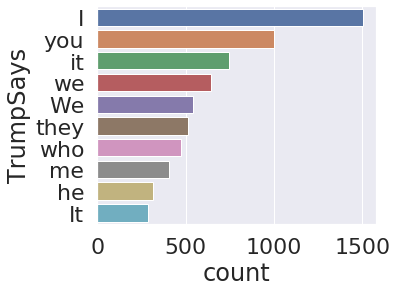

In [20]:
%matplotlib inline
import seaborn as sns #for visualization
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')
sns.set(font_scale=2)

tweets = pd.read_csv("../data/dataset/trump_tweets.csv")

text = tweets['text'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

doc = nlp(text)

items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

df_nouns = pd.DataFrame(items_of_interest, columns=["TrumpSays"])
plt.figure(figsize=(5,4))
sns.countplot(y="TrumpSays",
             data=df_nouns,
             order=df_nouns["TrumpSays"].value_counts().iloc[:10].index)
plt.show()

### WordCloud


In [22]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud

#Can you plot the entities that Trump mentions the most?
# Visit https://www.kaggle.com/nirant/hitchhiker-s-guide-to-nlp-in-spacy 
trump_topics = ???

plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(trump_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

SyntaxError: invalid syntax (<ipython-input-22-c6a2c052fd41>, line 6)

### Dependency Parsing

Dependency parsing is the process of assigning syntactic dependency labels that describe the relationships between individual tokens, like subject or object.

Dependency parsing analyzes the grammatical structure of a sentence. It establishes a "tree" like structure between a "root" word and those that are related to it by branches of some manner.


In [23]:
doc = nlp('Wall Street Journal just published an interesting piece on crypto currencies')
 
for token in doc:
    print("{0}/{1}<--{2}-- {3}/{4}".format(
        token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

Wall/NNP<--compound-- Street/NNP
Street/NNP<--compound-- Journal/NNP
Journal/NNP<--nsubj-- published/VBD
just/RB<--advmod-- published/VBD
published/VBD<--ROOT-- published/VBD
an/DT<--det-- piece/NN
interesting/JJ<--amod-- piece/NN
piece/NN<--dobj-- published/VBD
on/IN<--prep-- piece/NN
crypto/NNP<--compound-- currencies/NNS
currencies/NNS<--pobj-- on/IN


In [24]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

### Word Vectors

spaCy comes shipped with a Word Vector model as well. We’ll need to download a larger model for that:

`python -m spacy download en_core_web_lg`


In [25]:
nlp = spacy.load('en_core_web_lg')
print(nlp.vocab['banana'].vector)

[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8815e-01
 -2.1359e-01  2.7401e-01  2.4095e-01  4.5950e-01 -1.8605e-01 -1.0497e+00
 -9.7305e-02 -1.8908e-01 -7.0929e-01  4.0195e-01 -1.8768e-01  5.1687e-01
  1.2520e-01  8.4150e-01  1.2097e-01  8.8239e-02 -2.9196e-02  1.2151e-03
  5.6825e-02 -2.7421e-01  2.5564e-01  6.9793e-02 -2

**Computing Similarity**

Based on the word embeddings, spaCy offers a similarity interface for all of it’s building blocks: Token, Span, Doc and Lexeme. Here’s how to use that similarity interface:

In [26]:
banana = nlp.vocab['banana']
dog = nlp.vocab['dog']
fruit = nlp.vocab['fruit']
animal = nlp.vocab['animal']
 
print("'dog' is %s similar to 'animal' and %s similar to 'fruit'" % (dog.similarity(animal), dog.similarity(fruit)))
print("'banana' is %s similar to 'animal' and %s similar to 'fruit'" % (banana.similarity(animal), banana.similarity(fruit)))

'dog' is 0.66185343 similar to 'animal' and 0.23552851 similar to 'fruit'
'banana' is 0.24272855 similar to 'animal' and 0.67148364 similar to 'fruit'


Let’s now use this technique on entire texts:

In [27]:
target = nlp("Cats are beautiful animals.")
 
doc1 = nlp("Dogs are awesome.")
doc2 = nlp("Some gorgeous creatures are felines.")
doc3 = nlp("Dolphins are swimming mammals.")
doc4 = nlp("Snoopy is a very smart dog.")
doc5 = nlp("Tomorrow it will rain a lot in Berlin.")
 
print(target.similarity(doc1))
print(target.similarity(doc2))
print(target.similarity(doc3))
print(target.similarity(doc4))
print(target.similarity(doc5))

0.8901766262114666
0.9115828449161616
0.7822956256736615
0.7133323899064792
0.6526212010025575



"king" - "man" + "woman" = "queen"?

There’s a really famous example of word embedding math: "king" - "man" + "woman" = "queen". Let’s test that out:


In [30]:
from scipy import spatial
 
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
 
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector
queen = nlp.vocab['queen'].vector
king = nlp.vocab['king'].vector
 
# We now need to find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
maybe_queen = king - man + woman

# print("maybe_queen : {}".format(maybe_queen))

computed_similarities = []
 
for word in nlp.vocab:
    if word.has_vector:  # Ignore words without vectors
        similarity = cosine_similarity(maybe_queen, word.vector)
        computed_similarities.append((word, similarity))
 
computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

print([w[0].text for w in computed_similarities[:10]])

maybe_queen : [ 5.14087021e-01 -2.78459996e-01  2.42767006e-01  4.54899669e-02
 -2.59425014e-01 -3.19999963e-01  3.23920012e-01 -6.71030045e-01
 -9.98499990e-02  1.91499996e+00 -5.68080008e-01 -2.74451017e-01
 -1.49906695e-01  8.01083148e-02 -2.34764010e-01 -1.10950008e-01
 -1.02593988e-01  8.53819966e-01 -2.68564999e-01  3.85140002e-01
 -1.36149988e-01  6.35029972e-01 -7.62044966e-01 -2.52770007e-01
 -6.75969958e-01  3.89851004e-01 -2.89680034e-01  1.75860003e-01
 -5.16229987e-01  5.21373034e-01 -1.89909995e-01  6.73759937e-01
  1.17550008e-01 -4.69896019e-01  5.88999987e-01  1.29447982e-01
 -5.71900010e-01 -5.47450066e-01 -4.84210014e-01  5.85503951e-02
  4.82379973e-01 -2.86769986e-01 -2.01718003e-01 -4.74729985e-01
  3.43068987e-01 -2.28827983e-01 -1.76439017e-01  6.05450034e-01
  2.07139999e-01 -2.89762974e-01 -7.63288975e-01  4.37090009e-01
 -2.06220001e-01 -4.20252979e-01  1.98040009e-01  3.18709970e-01
 -9.51815993e-02 -3.23054016e-01 -6.02343976e-01  2.33427018e-01
 -2.1540999

 **Refer this link for more on similarity : https://medium.com/better-programming/the-beginners-guide-to-similarity-matching-using-spacy-782fc2922f7c**

**References**
- https://github.com/pyladies-bcn/spacy-workshop
- https://nlpforhackers.io/

**For further reading**
- https://github.com/explosion/spacy-notebooks
- Trump dataset exploration @ https://www.kaggle.com/nirant/hitchhiker-s-guide-to-nlp-in-spacy